# Advanced R Visualization

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/statcomp](https://feng.li/statcomp)

_>>> Link to Python version_ [1](https://feng.li/files/python/P03-Data-Visualization-with-Python/L03.1-Pandas-Data-Visualization.slides.html) [2](https://feng.li/files/python/P03-Data-Visualization-with-Python/L03.2-Statistical-Data-Visualization.slides.html) [3](https://feng.li/files/python/P03-Data-Visualization-with-Python/L03.3-Interactive-Data-Visualization.slides.html)

> "The simple graph has brought more information to the data analyst’s mind than any other device."

> — John Tukey

## The `mpg` data frame

`mpg` contains observations collected by the US Environment Protection Agency on 38 models of car. You can see more details via `?mpg`. Among the variables in `mpg` are:

1. `displ`, a car’s engine size, in litres.
2. `hwy`, a car's fuel efficiency on the highway, in miles per gallon (mpg). A car with a low fuel efficiency consumes more fuel than a car with a high fuel efficiency when they travel the same distance.
3. ...

## Basic plots

Practice and look at the help document of `plot`

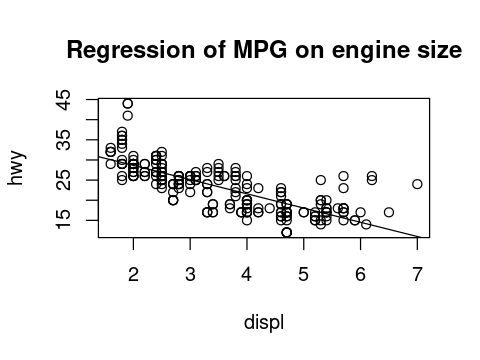

In [1]:
library(ggplot2)
attach(mpg)
plot(displ, hwy) 
abline(lm(hwy~displ))
title("Regression of MPG on engine size")

### Histograms and density plots

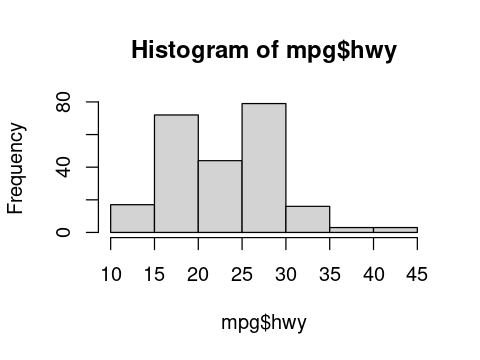

In [2]:
hist(mpg$hwy)

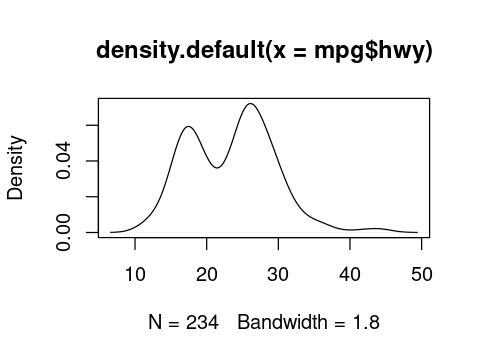

In [3]:
d <- density(mpg$hwy) # returns the density data 
plot(d) 

### Piechart

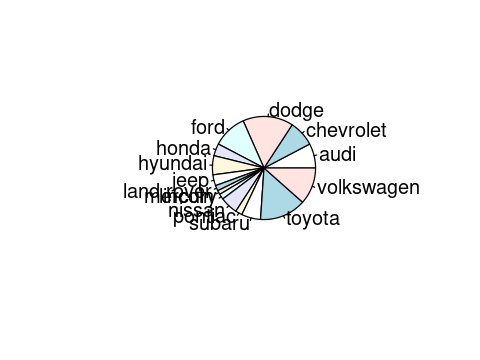

In [4]:
car.table <- table(mpg$manufacturer)
pie.cars <- car.table
names(pie.cars) <- names(car.table)
pie(pie.cars)

### Boxplots

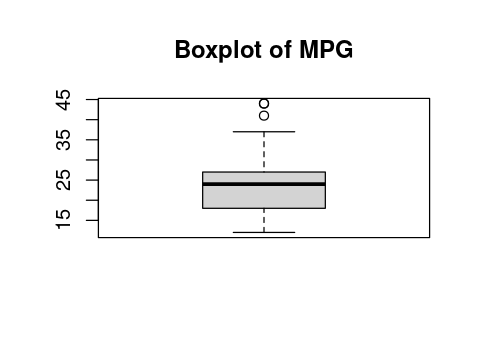

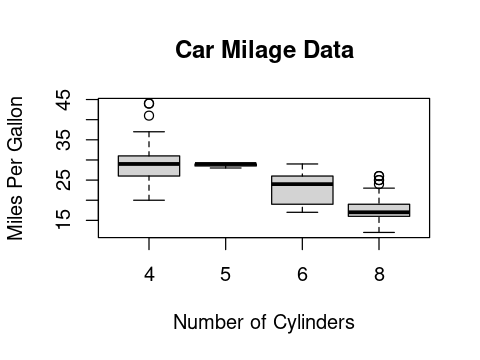

In [5]:
# Boxplot of MPG
boxplot(mpg$hwy, main = 'Boxplot of MPG')

# Boxplot of MPG by Car Cylinders 
boxplot(hwy~cyl,data = mpg, main = "Car Milage Data", 
  	xlab = "Number of Cylinders", ylab = "Miles Per Gallon")

### Correlation plot

corrplot 0.92 loaded



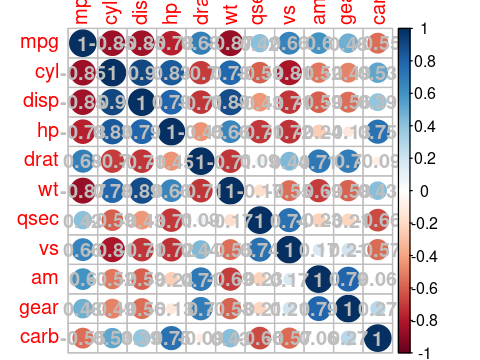

In [6]:
# install.packages("corrplot")
data(mtcars)
library(corrplot)
M <- cor(mtcars)
corrplot(M, addCoef.col = "grey")

### Time series

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: fma

Loading required package: expsmooth

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: tseries



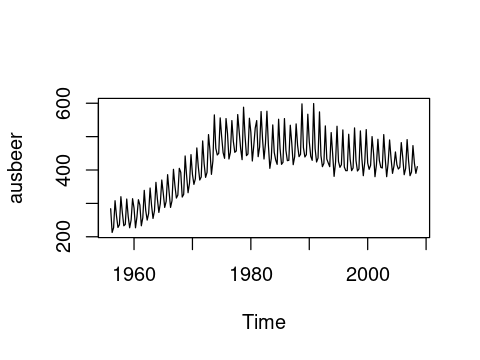

In [7]:
library(forecast)
library(fpp)
plot(ausbeer)

## Creating a ggplot

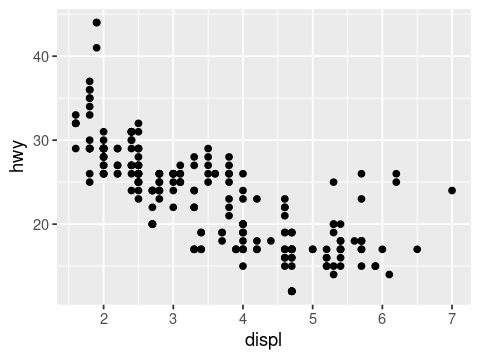

In [8]:
library(ggplot2)
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

- With ggplot2, you begin a plot with the function `ggplot()`. `ggplot()` creates a coordinate system that you can add layers to.

- `geom_point()` adds a layer of points to your plot, which creates a scatterplot. You can specify the color, size and shape of these points. Each geom function in ggplot2 takes a `mapping` argument. 

### Your turn (1) 💓

1. Run `ggplot(data = mpg)`. What do you see?

2. How many rows are in mpg? How many columns?

3. What does the `drv` variable describe? Read the help for `?mpg` to find out.

4. Make a scatterplot of `hwy` vs `cyl`.

5. What happens if you make a scatterplot of `class` vs `drv`? Why is the plot not useful?

6. What happens for the outliers?

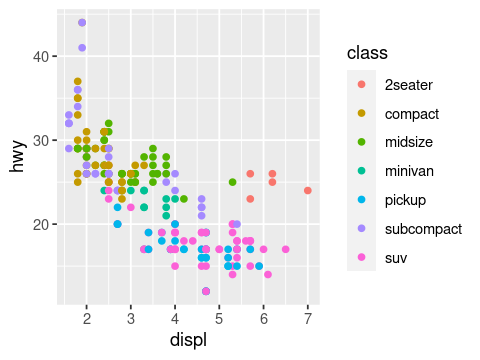

In [9]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

### Change the color, size and shape of points

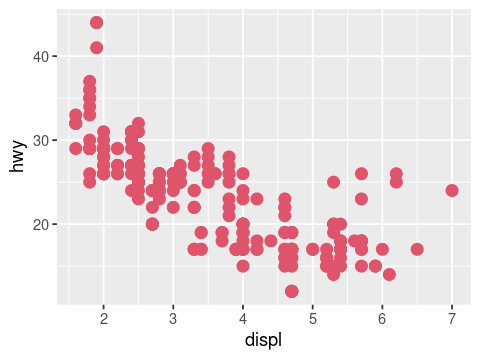

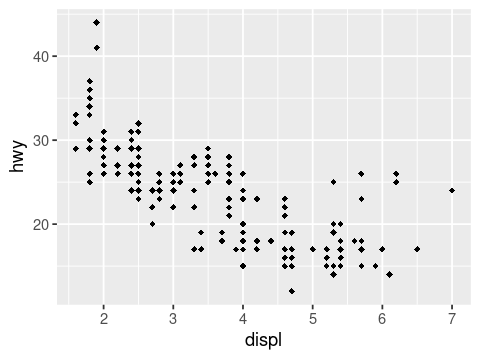

In [10]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = 2, size = 3)

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), shape = 18)

### Your turn (2) 💓

1. What’s gone wrong with this code? Why are the points not blue?

2. Which variables in `mpg` are categorical? Which variables are continuous? 

3. Map a continuous variable to `color`. How does it behave differently for categorical vs. continuous variables?

4. What happens if you use something other than a variable name as the color, like aes(colour = displ < 5)?

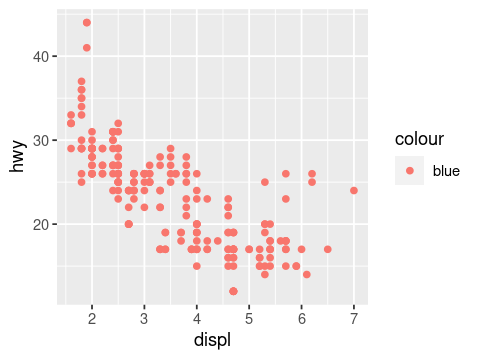

In [11]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))



### Facets

- Another way, particularly useful for categorical variables, is to split your plot into facets, subplots that each display one subset of the data.
- To facet your plot by a single variable, use `facet_wrap()`. The first argument should be a formula, which you create with ~ followed by a variable name. 

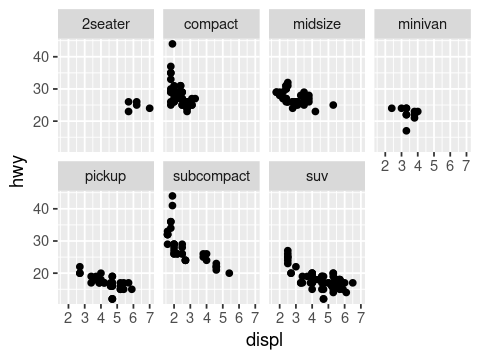

In [12]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2)



### Pairwise plots

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:fma’:

    pigs




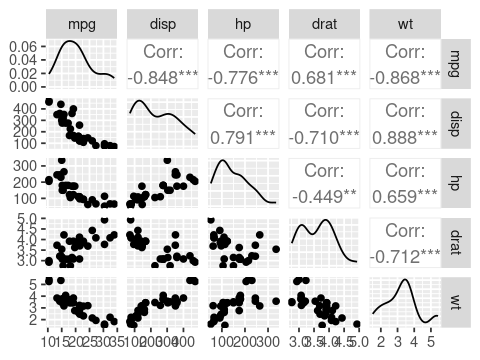

In [13]:
library(GGally)
ggpairs(subset(mtcars, select = c(1, 3, 4, 5, 6)))

### Bar chart

The following chart displays the total number of cars in the `mpg` dataset, grouped by `drv`.

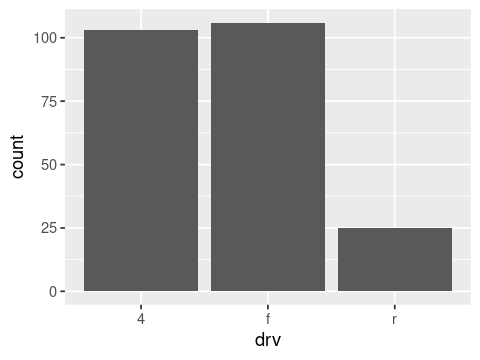

In [14]:
ggplot(data = mpg) +
  geom_bar(mapping = aes(x = drv))

- You can change the colors.

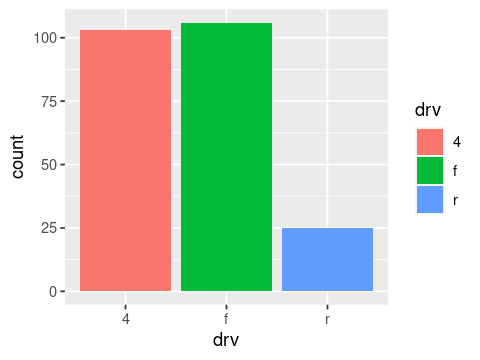

In [15]:
ggplot(data = mpg) + 
  geom_bar(mapping = aes(x = drv, fill = drv))

### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


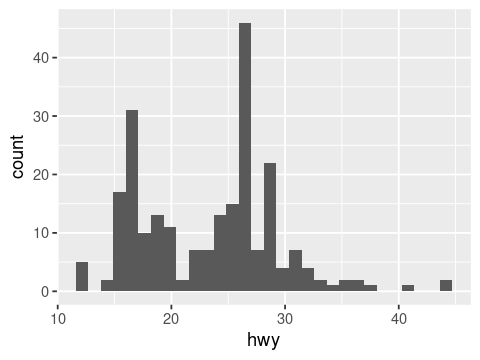

In [16]:
ggplot(data = mpg) + 
  geom_histogram(mapping = aes(x = hwy))

### Boxplots

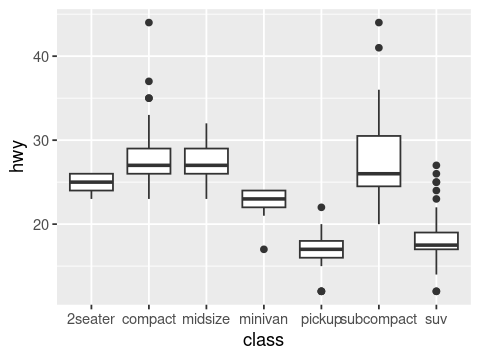

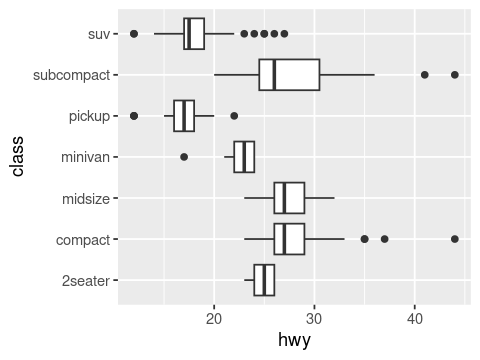

In [17]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()

### Time series

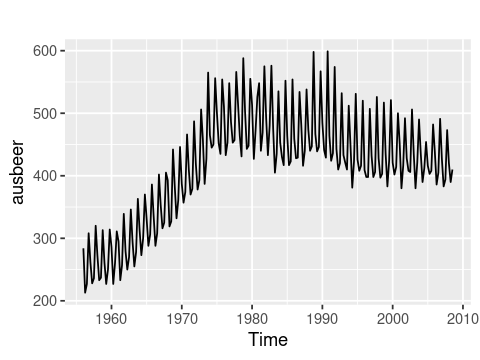

In [18]:
library(forecast)
library(fpp)
library(ggplot2)
autoplot(ausbeer)

### Interactive graphs with `plotly`

# Scatter Plot

```R
library(plotly)

set.seed(123)

x <- rnorm(1000)
y <- rchisq(1000, df = 1, ncp = 0)
group <- sample(LETTERS[1:5], size = 1000, replace = T)
size <- sample(1:5, size = 1000, replace = T)

ds <- data.frame(x, y, group, size)

p <- plot_ly(ds, x = x, y = y, mode = "markers", split = group, size = size) %>%
  layout(title = "Scatter Plot")
embed_notebook(p)
```

```R
library(plotly)
plot_ly(mpg, type="scatter", mode = 'markers', x = ~displ, y = ~hwy, color = ~drv,
        size = ~cyl, text = ~paste("manufacturer: ", manufacturer))
```

### Basic Histogram

```R
plot_ly(mpg, x = ~hwy, type = "histogram")
```

### Boxplots

```R
plot_ly(mpg, y = ~hwy, color = ~as.factor(cyl), type = "box")
```

### World maps

```R
df <- read.csv('data/2014_world_gdp_with_codes.csv')

# light grey boundaries
l <- list(color = toRGB("grey"), width = 0.5)

# specify map projection/options
g <- list(
  showframe = FALSE,
  showcoastlines = FALSE,
  projection = list(type = 'Mercator')
)

plot_geo(df) %>%
  add_trace(
    z = ~GDP..BILLIONS., color = ~GDP..BILLIONS., colors = 'Blues',
    text = ~COUNTRY, locations = ~CODE, marker = list(line = l)
  ) %>%
  colorbar(title = 'GDP Billions US$', tickprefix = '$') %>%
  layout(
    title = '2014 Global GDP',
    geo = g
  )
```

## Shiny App

Shiny apps have two components:

1. **A user-interface script.** The user-interface (ui) script controls the layout and appearance of your app. It is defined in a source script named `ui.R`. 
2. **A server script.** The `server.R` script contains the instructions that your computer needs to build your app. 

Put the two `.R` files in one folder and you can run the app in **Rstudio**.

### Number of telephones in different regions

`ui.R`

```R
# Rely on the 'WorldPhones' dataset in the datasets
# package (which generally comes preloaded).
library(datasets)

# Use a fluid Bootstrap layout
fluidPage(    
  
  # Give the page a title
  titlePanel("Telephones by region"),
  
  # Generate a row with a sidebar
  sidebarLayout(      
    
    # Define the sidebar with one input
    sidebarPanel(
      selectInput("region", "Region:", 
                  choices=colnames(WorldPhones)),
      hr(),
      helpText("Data from AT&T (1961) The World's Telephones.")
    ),
    
    # Create a spot for the barplot
    mainPanel(
      plotOutput("phonePlot")  
    )
    
  )
)
```

### Number of telephones in different regions

`server.R`

```R
# Rely on the 'WorldPhones' dataset in the datasets
# package (which generally comes preloaded).
library(datasets)

# Define a server for the Shiny app
function(input, output) {
  
  # Fill in the spot we created for a plot
  output$phonePlot <- renderPlot({
    
    # Render a barplot
    barplot(WorldPhones[,input$region]*1000, 
            main=input$region,
            ylab="Number of Telephones",
            xlab="Year")
  })
}
```

### Density of a normal distribution
`ui.R`

```R
library(shiny)

# Define UI 
fluidPage(
  
  # Application title
  titlePanel("Please choose a mean and sd"),
  
  # Sidebar with controls 
  sidebarLayout(
    sidebarPanel(
      numericInput("mean", 
                   label = h3("Mean"), 
                   value = 1),
      
      selectInput("sd", label = h3("Standard Deviation"), 
                  choices = list("1" = 1, "2" = 2,
                                 "3" = 3), selected = 1)
  
    ),
    

    mainPanel(
      h2("This is the density plot of normal distribution."),
      h3("Note how it changes with mean and sd."),
      plotOutput("normPlot")
    )
  )
)
```

### Density of a normal distribution
`server.R`

```R
library(shiny)
# Define server logic required to plot density of normal distribution
function(input, output) {
  output$normPlot <- renderPlot({
    plot(density(rnorm(1000, mean = as.numeric(input$mean), 
               sd = as.numeric(input$sd))), main = 'normal density',
         xlim = c(-10, 10))
  })
}
```

# References

1. Robert I. Kabacoff (2015). R in action (2ed). Manning.
2. [R for data science](http://r4ds.had.co.nz/index.html)
3. [The **plotly** site](https://plot.ly/r/)
4. [The **shiny** site](https://shiny.rstudio.com/)